# Sentiment analysis with Logistic Regression

### Real Example (Breast Cancer)

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\moham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Importing Needed Libraries


In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

Getting The Dataset

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']
#calculating mean, ste, and largest number for numeric values and adding them to new columns:
for attr in ['mean', 'ste', 'largest']:
  for feature in features:
    column_names.append(feature + "_" + attr)

Displaying the Dataset

In [4]:
dataset = pd.read_csv(url, names=column_names)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_poinits_mean,...,radius_largest,texture_largest,perimeter_largest,area_largest,smoothness_largest,compactness_largest,concavity_largest,concave_poinits_largest,symmetry_largest,fractal_dimension_largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Analyzing the Dataset

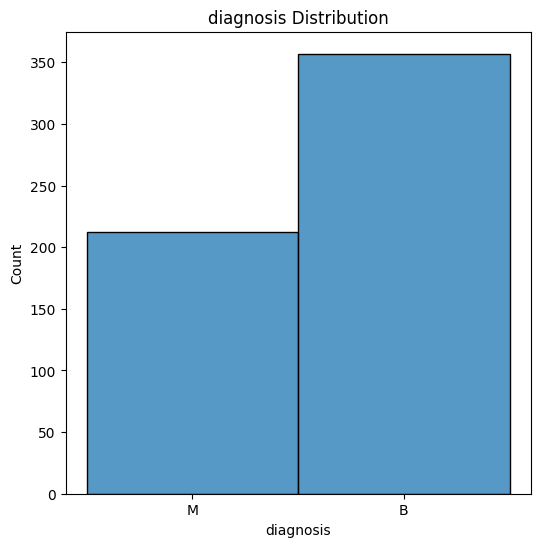

In [5]:
# distribution of Brand value

plt.figure(figsize=(6,6))
sns.histplot(dataset['diagnosis'])
plt.title('diagnosis Distribution')
plt.show()

Replacing non-Numeric Values

In [6]:
# encoding "Brand" Column
dataset['diagnosis'] = dataset['diagnosis'].map({'M':0,'B':1})

Splitting the Data into feautures (X) and labels (Y):

In [7]:
X = dataset.drop(['id','diagnosis'],axis=1)
Y = dataset['diagnosis']


Splitting Training and Test data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [9]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


logistic Regression (Classification) SKLearn

In [10]:
from sklearn.metrics import mean_squared_error

def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    
    train_error = np.sqrt(mean_squared_error(Y_train, ytrain_predict))
    test_error = np.sqrt(mean_squared_error(Y_test, ytest_predict))
    
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    # Scatter plot for training and testing predictions
    plt.scatter(Y_train, ytrain_predict, marker='o', label='Train Predictions')
    plt.scatter(Y_test, ytest_predict, marker='^', label='Test Predictions')

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Values')
    plt.legend()
    plt.show()

    print("Coefficients:")
    print(coefs)

In [11]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
clf.score(X, Y)

0.9525483304042179

Model Evaluation (Visualize the True and Predicted Values) and getting Mismatches and Error

Training error (rmse): 0.2198900824313101
Testing error (rmse): 0.20942695414584775


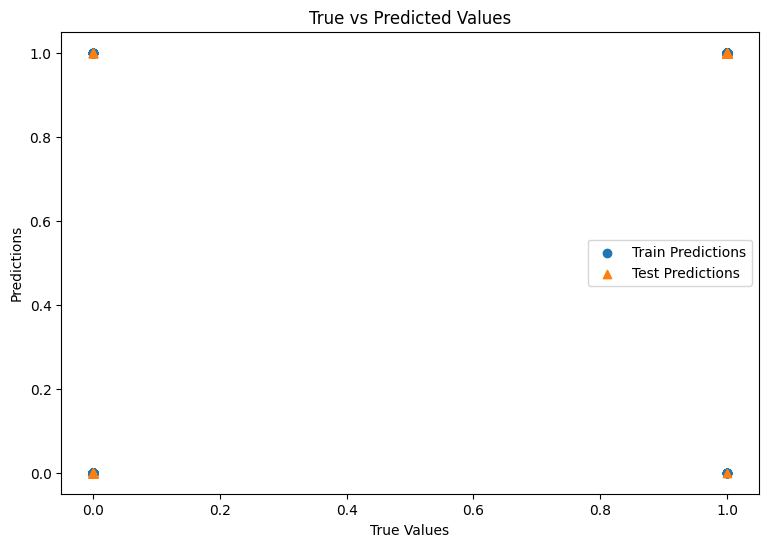

Coefficients:
[array([0.27701128]), array([ 1.43978993,  0.34055944,  0.11876731, -0.01239693, -0.05539445,
       -0.26314779, -0.36412989, -0.15636376, -0.08280931, -0.01668629,
        0.0478151 ,  0.66257738,  0.05277026, -0.07183208, -0.0052296 ,
       -0.05296538, -0.0735647 , -0.02006164, -0.01957298, -0.00460779,
        1.50214357, -0.53096256, -0.18735314, -0.02247454, -0.09849363,
       -0.79257732, -0.98008479, -0.28847157, -0.26822131, -0.07380259])]
Number of mismatches: 5
Number of mismatches (using accuracy): 5


In [15]:
from sklearn.metrics import accuracy_score
display_results(clf)
# Calculate the number of mismatched points
ytest_predict = clf.predict(X_test)

mismatches = sum(Y_test != ytest_predict)

# Alternatively, you can calculate mismatches using accuracy
accuracy = accuracy_score(Y_test, ytest_predict)
mismatches_from_accuracy = len(Y_test) * (1 - accuracy)

print(f'Number of mismatches: {mismatches}')
print(f'Number of mismatches (using accuracy): {int(mismatches_from_accuracy)}')

Displaying Model Coefficients (weights) and Bias

In [16]:
weights = clf.coef_
bias = clf.intercept_
print(weights)
print(bias)

[[ 1.43978993  0.34055944  0.11876731 -0.01239693 -0.05539445 -0.26314779
  -0.36412989 -0.15636376 -0.08280931 -0.01668629  0.0478151   0.66257738
   0.05277026 -0.07183208 -0.0052296  -0.05296538 -0.0735647  -0.02006164
  -0.01957298 -0.00460779  1.50214357 -0.53096256 -0.18735314 -0.02247454
  -0.09849363 -0.79257732 -0.98008479 -0.28847157 -0.26822131 -0.07380259]]
[0.27701128]


Building a Predictive System

In [17]:
input_data =(19,11,124,1000,0.3,0.4,0.2,0.35,0.7,0.2,1,1,1,1,1,1,1,1,1,1,26,19,183,2000,0.3,0.8,0.5,0.15,0.6,0.2)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

print('The Tumor is (0 for M, and 1 for B): ', prediction[0])

[0]
The Tumor is (0 for M, and 1 for B):  0


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
